In [56]:
import cv2
import keras
import os
import numpy as np

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# image retrieval 

In [18]:
train_path="./training_data"
os.listdir("./training_data")

['images_nic', 'images_notnic']

In [19]:
folders=[os.path.join(train_path,folder) for folder in os.listdir(train_path)]
print(folders)

['./training_data/images_nic', './training_data/images_notnic']


In [30]:
picfiles_nic=[os.path.join(folders[0],picfile) for picfile in os.listdir(folders[0])]
picfiles_notnic=[os.path.join(folders[1],picfile) for picfile in os.listdir(folders[1])]
print(picfiles_nic[:10])
print(picfiles_notnic[:10])

['./training_data/images_nic/nic_219', './training_data/images_nic/nic_1404', './training_data/images_nic/nic_1139', './training_data/images_nic/nic_227', './training_data/images_nic/nic_1110', './training_data/images_nic/nic_1337', './training_data/images_nic/nic_1267', './training_data/images_nic/nic_532', './training_data/images_nic/nic_270', './training_data/images_nic/nic_1322']
['./training_data/images_notnic/nic_219', './training_data/images_notnic/nic_227', './training_data/images_notnic/nic_532', './training_data/images_notnic/nic_270', './training_data/images_notnic/nic_131', './training_data/images_notnic/nic_293', './training_data/images_notnic/nic_110', './training_data/images_notnic/nic_427', './training_data/images_notnic/nic_138', './training_data/images_notnic/nic_519']


In [90]:
image_test=cv2.imread(picfiles_nic[3])
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
#using matplotlib
#import matplotlib.image as mpimg
#image_test = mpimg.imread(picfiles_nic[45])

In [91]:
print(type(image_test))
print(image_test.shape)

<class 'numpy.ndarray'>
(128, 87, 3)


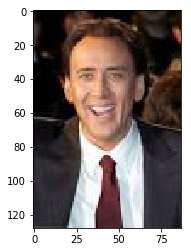

In [92]:
plt.imshow(image_test)

# Image manipulation

In [93]:
image_size=90

##  resizing

In [94]:
image_test = cv2.resize(image_test, (image_size, image_size),0,0, cv2.INTER_LINEAR)

## normalizing

In [95]:
image_test = image_test.astype(np.float32)
image_test = np.multiply(image_test, 1.0 / 255.0)
print(image_test.shape)

(90, 90, 3)


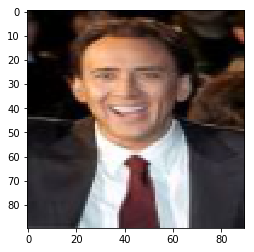

In [96]:
plt.imshow(image_test)

## Load and transform images

In [153]:
def read_image(path):
    image=cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
    


def load_images(train_path):
    y_train=np.array([])
    picfiles=[]
    folders=[os.path.join(train_path,folder) for folder in os.listdir(train_path)]
    picfiles_nic=[os.path.join(folders[0],picfile) for picfile in os.listdir(folders[0])]
    picfiles_notnic=[os.path.join(folders[1],picfile) for picfile in os.listdir(folders[1])]
    y_train_nic=np.ones([len(picfiles_nic)])
    y_train_notnic=np.zeros([len(picfiles_notnic)])
    y_train=np.concatenate((y_train_nic,y_train_notnic))
    picfiles.extend(picfiles_nic)
    picfiles.extend(picfiles_notnic)
    picfiles=[read_image(picfile) for picfile in picfiles]
    return picfiles,y_train

def manipulated_images(images,image_size):
    mimage=[]
    for image in images:
        image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
        image= image.astype(np.float32)
        image = np.multiply(image, 1.0 / 255.0)
        mimage.append(image)
    return np.array(mimage)
    

In [150]:
p,y=load_images(train_path)


In [155]:
pm=manipulated_images(p,90)

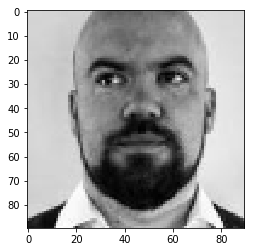

In [163]:
plt.imshow(pm[1119])

In [189]:
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)

In [190]:
print(y)
print(Y)

[ 1.  1.  1. ...,  0.  0.  0.]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pm, Y, test_size=0.20, random_state=42)

## model

In [193]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.core import Flatten


In [198]:

img_rows = 90
img_cols = 90
kernel_size = 3 
pool_size = 2 
model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate 32 default
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 3))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(Convolution2D(32, # Number convolution channels to generate 32 default
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 32))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [199]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 88, 88, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 86, 86, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 86, 86, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 59168)             0         
__________

In [201]:
model.fit(
    X_train, # Training data
    y_train, # Labels of training data
    batch_size=64, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
132s - loss: 0.9726 - acc: 0.6073
Epoch 2/20
128s - loss: 0.5397 - acc: 0.7194
Epoch 3/20
128s - loss: 0.4339 - acc: 0.8174
Epoch 4/20
132s - loss: 0.3638 - acc: 0.8597
Epoch 5/20
129s - loss: 0.2981 - acc: 0.8886
Epoch 6/20
128s - loss: 0.1966 - acc: 0.9302
Epoch 7/20
130s - loss: 0.1446 - acc: 0.9488
Epoch 8/20
129s - loss: 0.1041 - acc: 0.9644
Epoch 9/20
130s - loss: 0.1336 - acc: 0.9510
Epoch 10/20
129s - loss: 0.0657 - acc: 0.9777
Epoch 11/20
129s - loss: 0.0398 - acc: 0.9911
Epoch 12/20
129s - loss: 0.0362 - acc: 0.9896
Epoch 13/20
129s - loss: 0.0189 - acc: 0.9955
Epoch 14/20
129s - loss: 0.0165 - acc: 0.9955
Epoch 15/20
133s - loss: 0.0173 - acc: 0.9941
Epoch 16/20
128s - loss: 0.0112 - acc: 0.9963
Epoch 17/20
131s - loss: 0.0093 - acc: 0.9985
Epoch 18/20
129s - loss: 0.0081 - acc: 0.9985
Epoch 19/20
129s - loss: 0.0056 - acc: 0.9993
Epoch 20/20
129s - loss: 0.0082 - acc: 0.9978


In [202]:
score = model.evaluate(X_test, y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

337/337 [==============================] - 11s    
Test loss 0.594028495363
Test accuracy 0.872403561185


In [203]:
preds = model.predict_classes(X_test)

337/337 [==============================] - 11s    


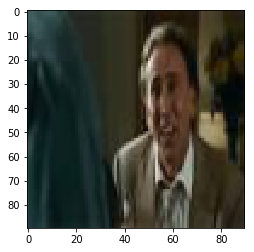

1/1 [==============================] - 0s
[1]


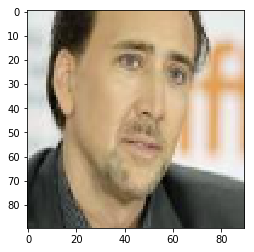

1/1 [==============================] - 0s
[0]


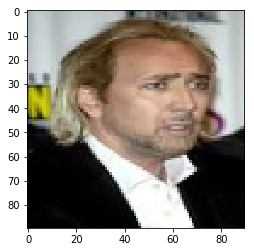

1/1 [==============================] - 0s
[1]


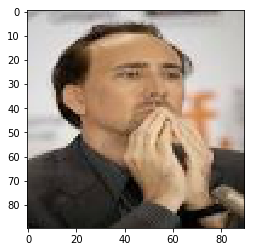

1/1 [==============================] - 0s
[1]


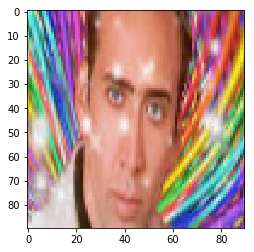

1/1 [==============================] - 0s
[1]


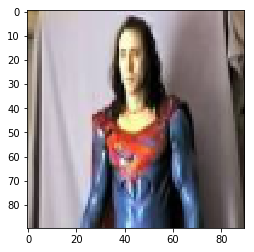

1/1 [==============================] - 0s
[1]


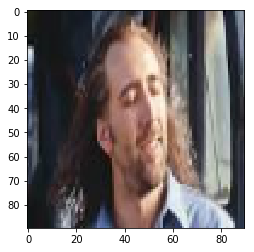

1/1 [==============================] - 0s
[1]


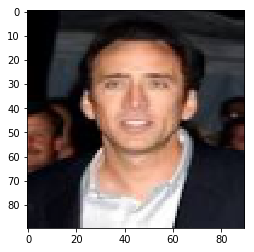

1/1 [==============================] - 0s
[1]


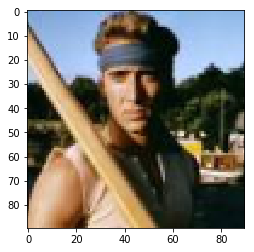

1/1 [==============================] - 0s
[1]


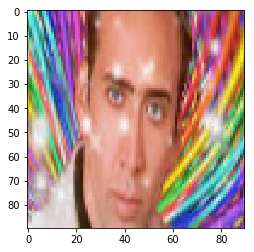

1/1 [==============================] - 0s
[1]


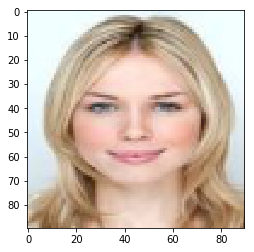

1/1 [==============================] - 0s
[0]


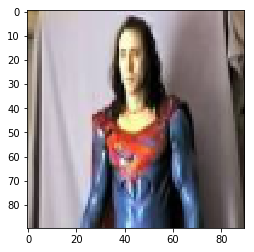

1/1 [==============================] - 0s
[1]


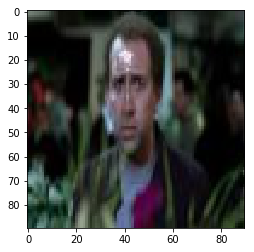

1/1 [==============================] - 0s
[1]


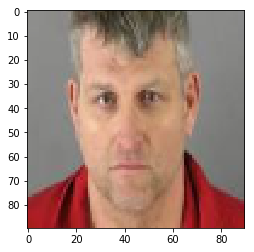

1/1 [==============================] - 0s
[0]


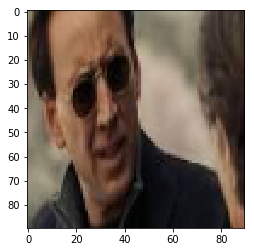

1/1 [==============================] - 0s
[1]


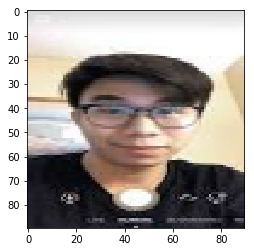

1/1 [==============================] - 0s
[0]


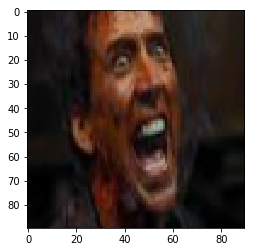

1/1 [==============================] - 0s
[1]


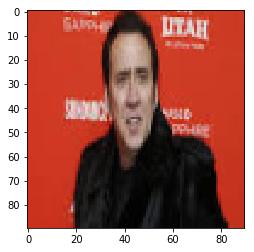

1/1 [==============================] - 0s
[1]


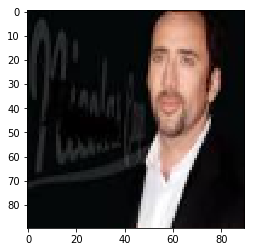

1/1 [==============================] - 0s
[1]


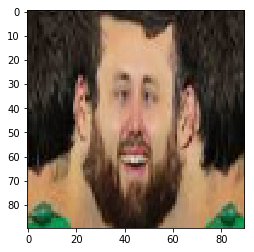

1/1 [==============================] - 0s
[1]


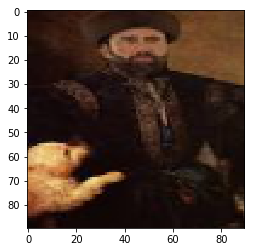

1/1 [==============================] - 0s
[1]


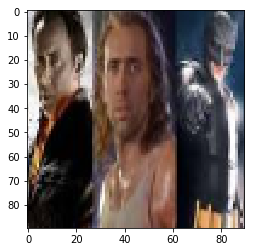

1/1 [==============================] - 0s
[1]


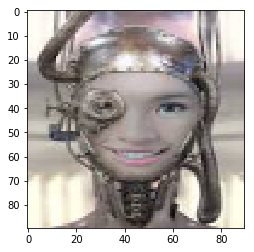

1/1 [==============================] - 0s
[0]


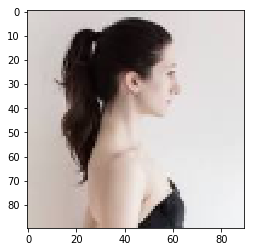

1/1 [==============================] - 0s
[0]


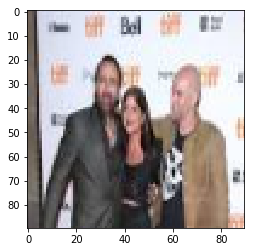

1/1 [==============================] - 0s
[1]


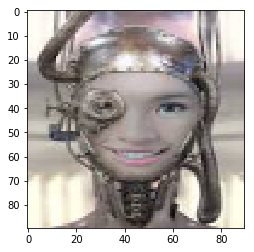

1/1 [==============================] - 0s
[0]


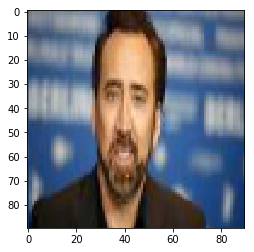

1/1 [==============================] - 0s
[1]


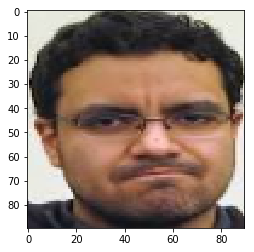

1/1 [==============================] - 0s
[0]


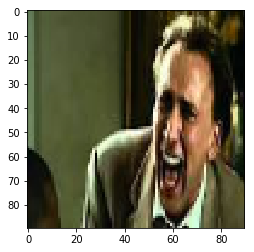

1/1 [==============================] - 0s
[1]


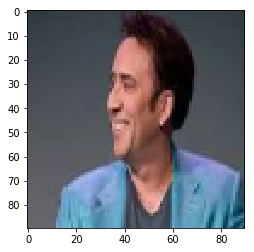

1/1 [==============================] - 0s
[1]


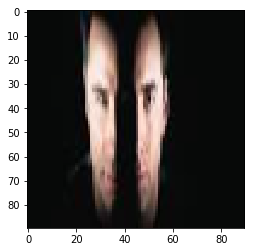

1/1 [==============================] - 0s
[0]


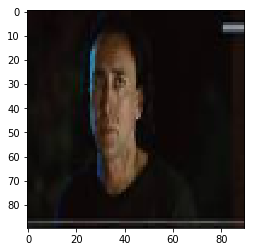

1/1 [==============================] - 0s
[1]


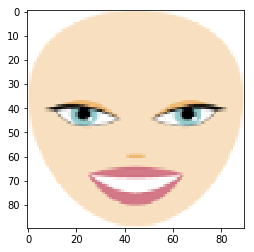

1/1 [==============================] - 0s
[0]


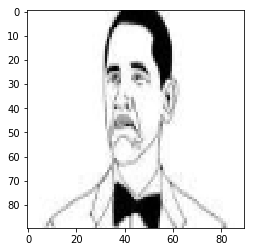

1/1 [==============================] - 0s
[0]


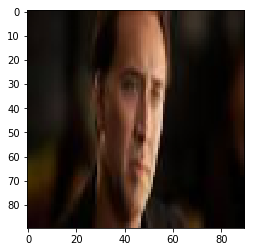

1/1 [==============================] - 0s
[1]


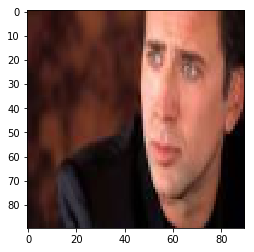

1/1 [==============================] - 0s
[1]


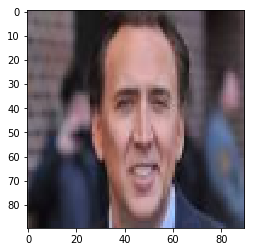

1/1 [==============================] - 0s
[1]


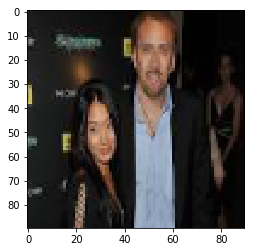

1/1 [==============================] - 0s
[1]


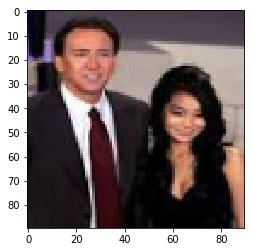

1/1 [==============================] - 0s
[1]


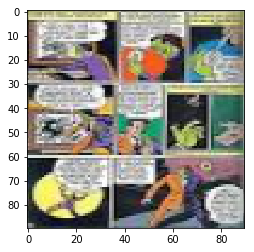

1/1 [==============================] - 0s
[1]


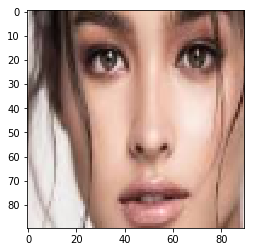

1/1 [==============================] - 0s
[0]


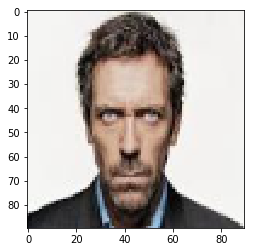

1/1 [==============================] - 0s
[0]


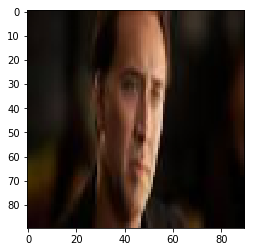

1/1 [==============================] - 0s
[1]


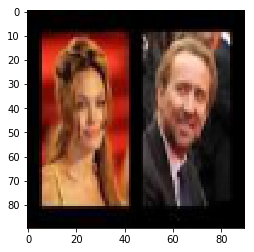

1/1 [==============================] - 0s
[1]


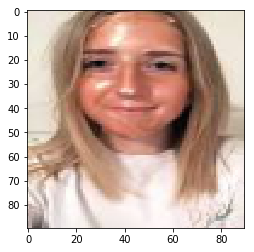

1/1 [==============================] - 0s
[0]


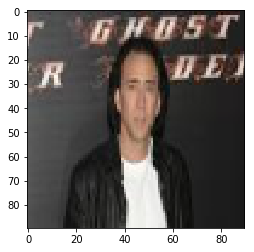

1/1 [==============================] - 0s
[1]


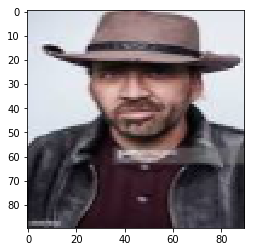

1/1 [==============================] - 0s
[1]


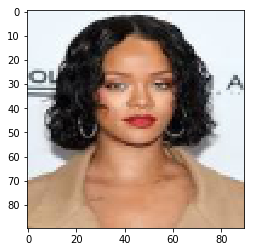

1/1 [==============================] - 0s
[0]


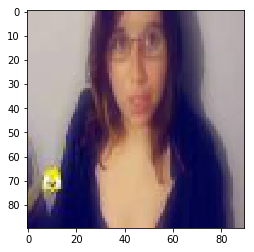

1/1 [==============================] - 0s
[1]


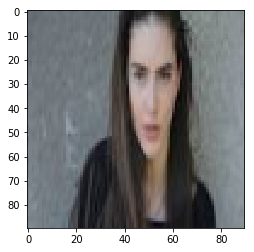

1/1 [==============================] - 0s
[1]


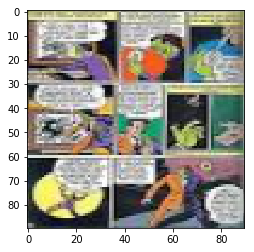

1/1 [==============================] - 0s
[1]


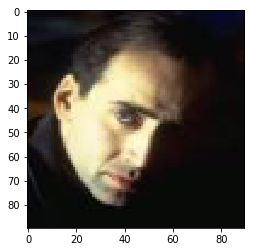

1/1 [==============================] - 0s
[1]


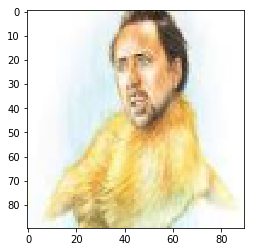

1/1 [==============================] - 0s
[1]


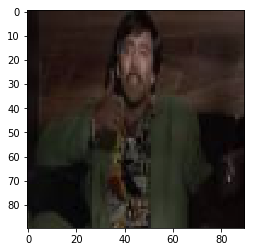

1/1 [==============================] - 0s
[1]


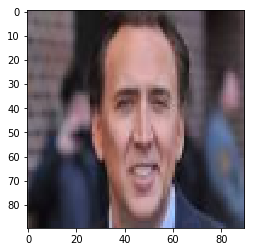

1/1 [==============================] - 0s
[1]


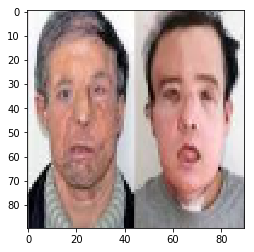

1/1 [==============================] - 0s
[1]


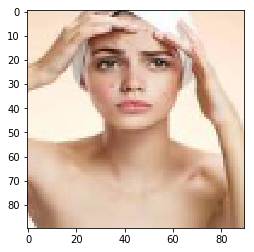

1/1 [==============================] - 0s
[0]


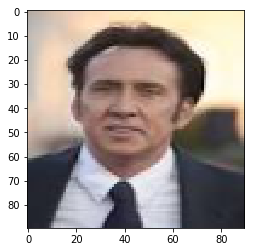

1/1 [==============================] - 0s
[1]


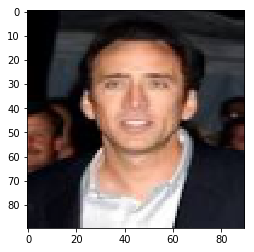

1/1 [==============================] - 0s
[1]


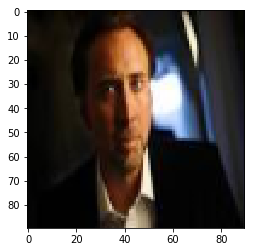

1/1 [==============================] - 0s
[1]


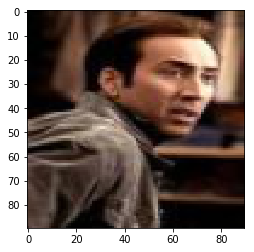

1/1 [==============================] - 0s
[1]


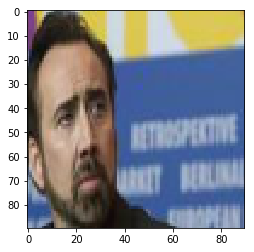

1/1 [==============================] - 0s
[1]


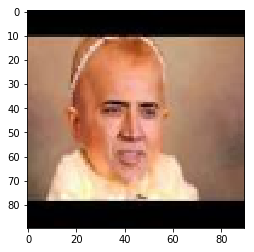

1/1 [==============================] - 0s
[1]


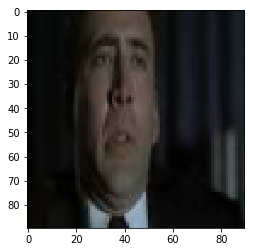

1/1 [==============================] - 0s
[1]


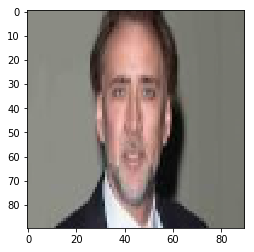

1/1 [==============================] - 0s
[1]


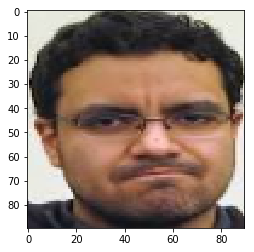

1/1 [==============================] - 0s
[0]


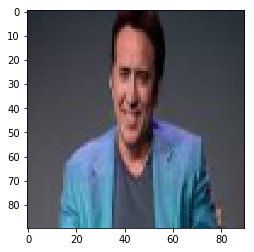

1/1 [==============================] - 0s
[1]


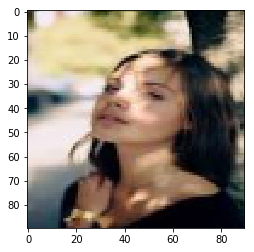

1/1 [==============================] - 0s
[1]


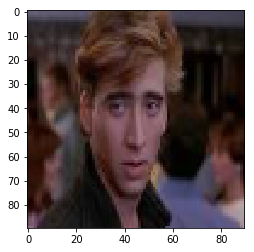

1/1 [==============================] - 0s
[1]


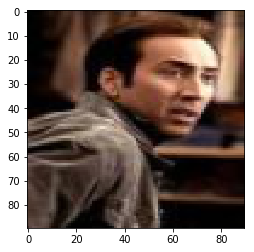

1/1 [==============================] - 0s
[1]


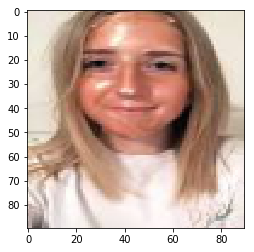

1/1 [==============================] - 0s
[0]


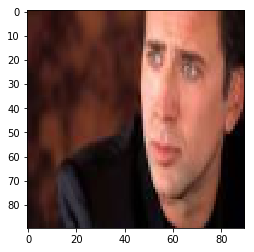

1/1 [==============================] - 0s
[1]


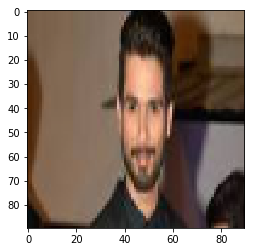

1/1 [==============================] - 0s
[0]


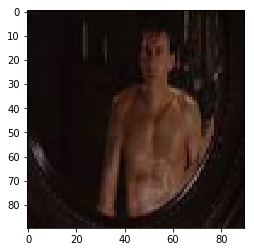

1/1 [==============================] - 0s
[1]


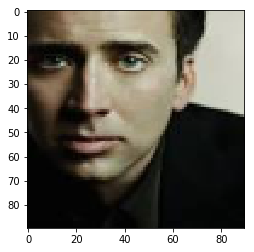

1/1 [==============================] - 0s
[1]


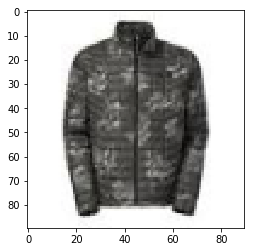

1/1 [==============================] - 0s
[0]


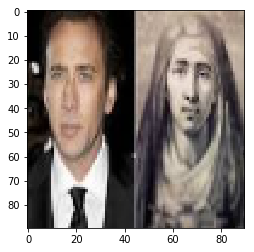

1/1 [==============================] - 0s
[1]


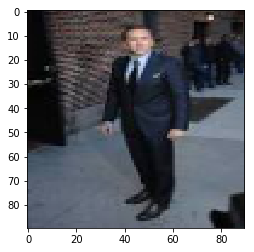

1/1 [==============================] - 0s
[1]


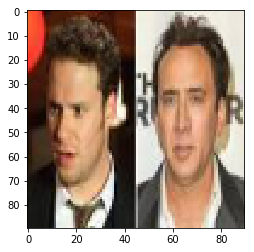

1/1 [==============================] - 0s
[1]


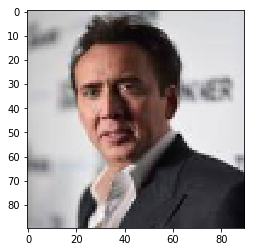

1/1 [==============================] - 0s
[1]


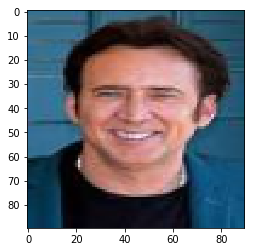

1/1 [==============================] - 0s
[1]


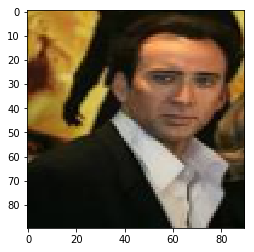

1/1 [==============================] - 0s
[1]


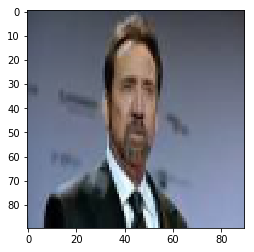

1/1 [==============================] - 0s
[1]


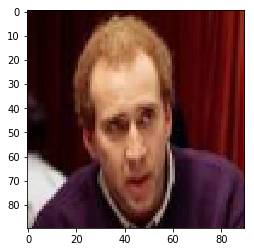

1/1 [==============================] - 0s
[1]


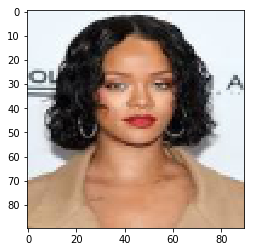

1/1 [==============================] - 0s
[0]


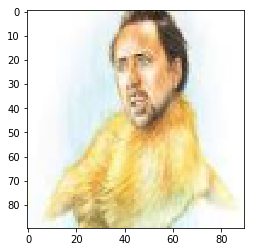

1/1 [==============================] - 0s
[1]


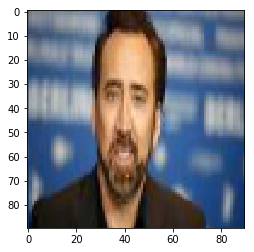

1/1 [==============================] - 0s
[1]


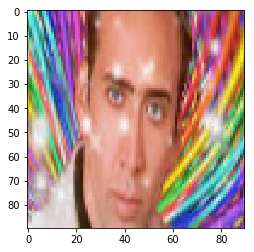

1/1 [==============================] - 0s
[1]


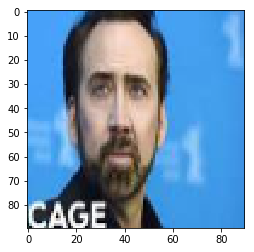

1/1 [==============================] - 0s
[1]


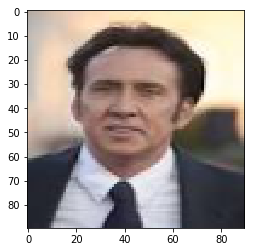

1/1 [==============================] - 0s
[1]


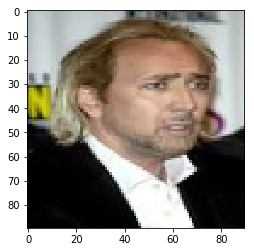

1/1 [==============================] - 0s
[1]


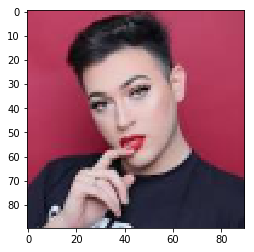

1/1 [==============================] - 0s
[0]


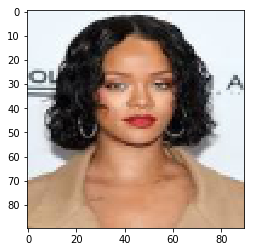

1/1 [==============================] - 0s
[0]


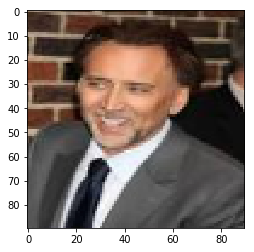

1/1 [==============================] - 0s
[1]


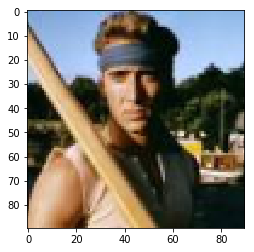

1/1 [==============================] - 0s
[1]


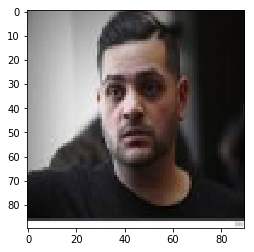

1/1 [==============================] - 0s
[1]


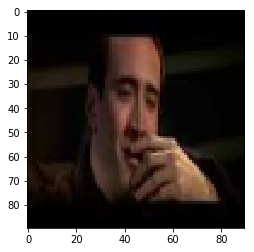

1/1 [==============================] - 0s
[1]


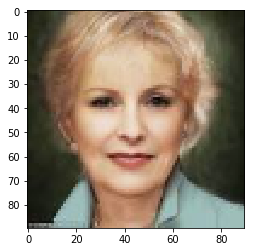

1/1 [==============================] - 0s
[0]


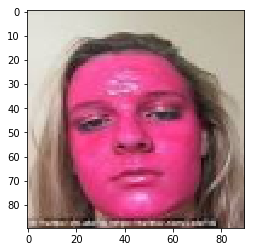

1/1 [==============================] - 0s
[0]


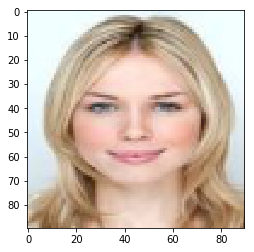

1/1 [==============================] - 0s
[0]


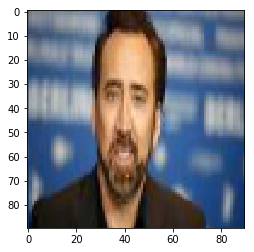

1/1 [==============================] - 0s
[1]


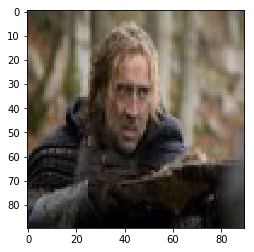

1/1 [==============================] - 0s
[1]


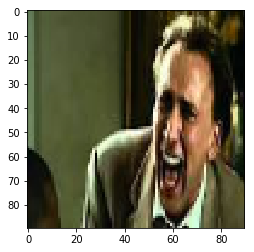

1/1 [==============================] - 0s
[1]


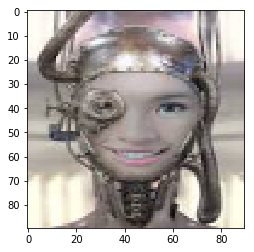

1/1 [==============================] - 0s
[0]


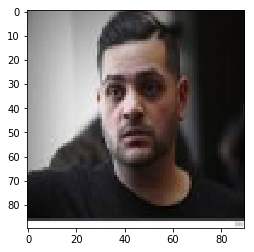

1/1 [==============================] - 0s
[1]


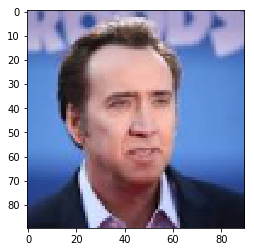

1/1 [==============================] - 0s
[1]


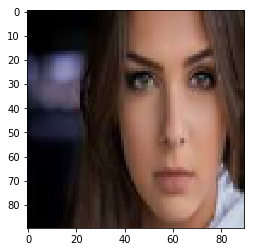

1/1 [==============================] - 0s
[1]


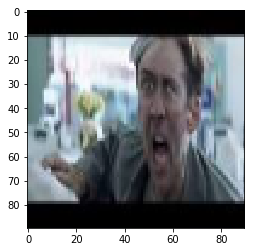

1/1 [==============================] - 0s
[1]


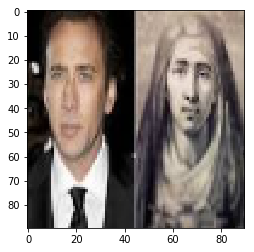

1/1 [==============================] - 0s
[1]


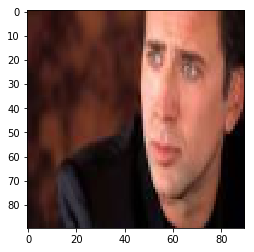

1/1 [==============================] - 0s
[1]


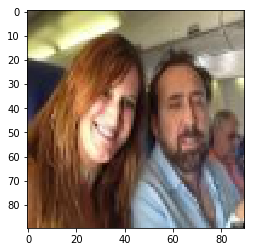

1/1 [==============================] - 0s
[1]


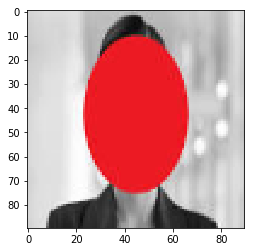

1/1 [==============================] - 0s
[1]


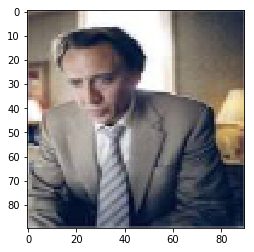

1/1 [==============================] - 0s
[1]


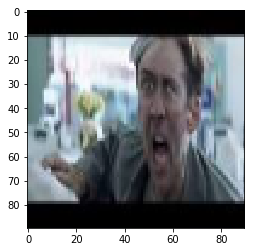

1/1 [==============================] - 0s
[1]


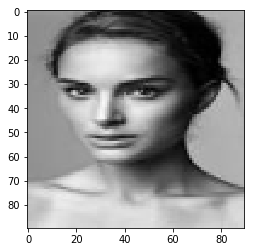

1/1 [==============================] - 0s
[0]


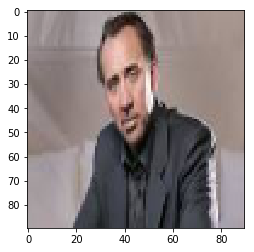

1/1 [==============================] - 0s
[1]


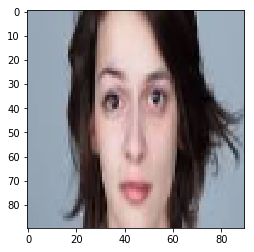

1/1 [==============================] - 0s
[0]


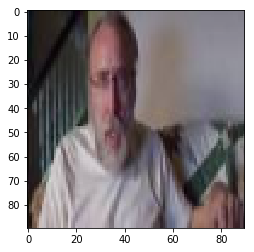

1/1 [==============================] - 0s
[1]


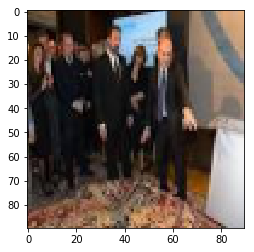

1/1 [==============================] - 0s
[1]


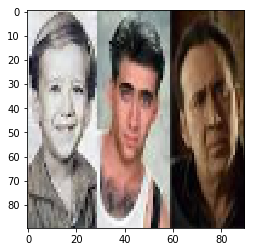

1/1 [==============================] - 0s
[1]


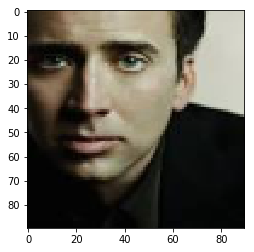

1/1 [==============================] - 0s
[1]


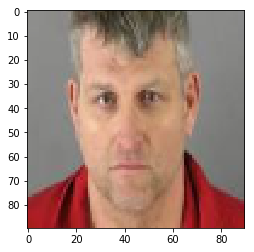

1/1 [==============================] - 0s
[0]


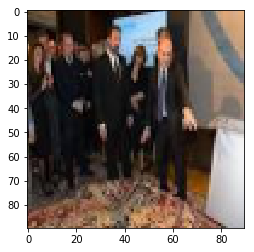

1/1 [==============================] - 0s
[1]


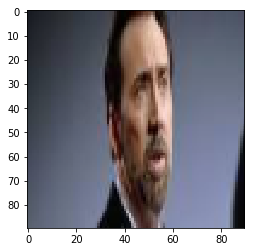

1/1 [==============================] - 0s
[1]


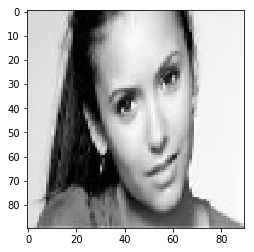

1/1 [==============================] - 0s
[0]


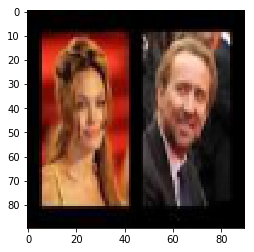

1/1 [==============================] - 0s
[1]


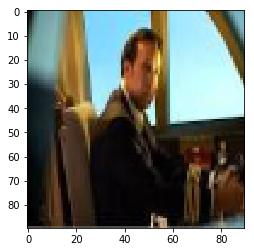

1/1 [==============================] - 0s
[1]


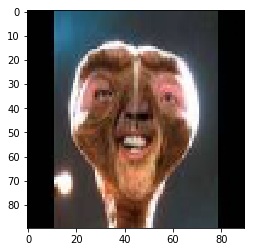

1/1 [==============================] - 0s
[1]


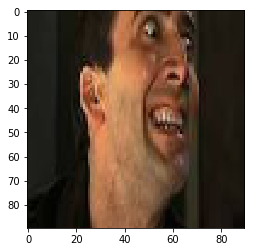

1/1 [==============================] - 0s
[1]


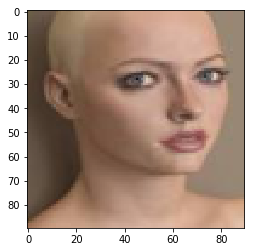

1/1 [==============================] - 0s
[0]


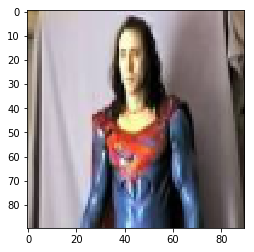

1/1 [==============================] - 0s
[1]


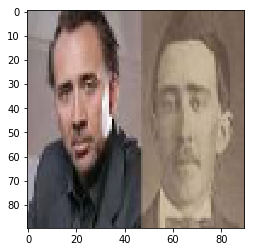

1/1 [==============================] - 0s
[1]


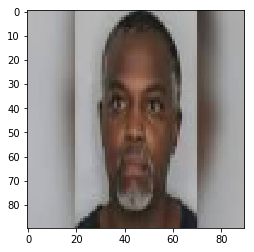

1/1 [==============================] - 0s
[0]


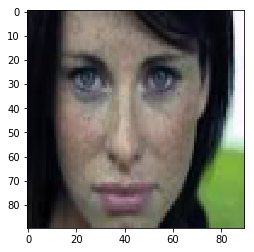

1/1 [==============================] - 0s
[0]


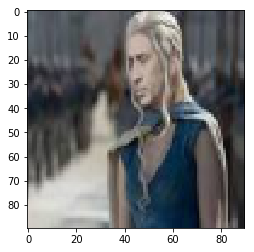

1/1 [==============================] - 0s
[0]


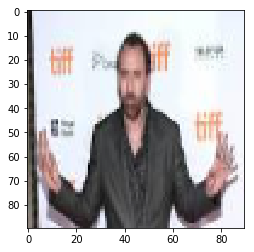

1/1 [==============================] - 0s
[1]


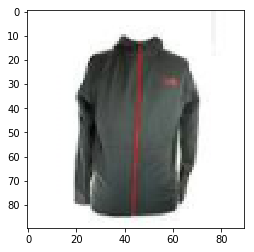

1/1 [==============================] - 0s
[0]


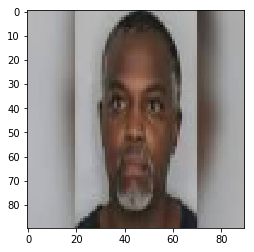

1/1 [==============================] - 0s
[0]


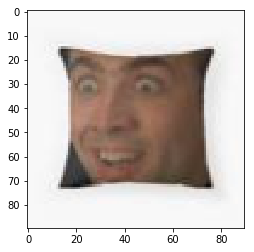

1/1 [==============================] - 0s
[0]


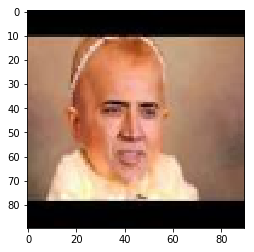

1/1 [==============================] - 0s
[1]


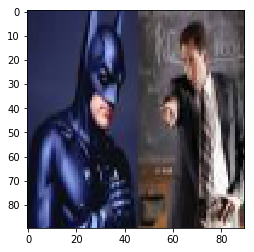

1/1 [==============================] - 0s
[1]


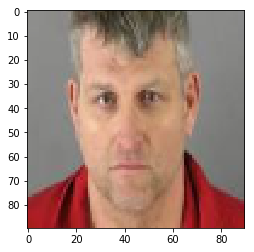

1/1 [==============================] - 0s
[0]


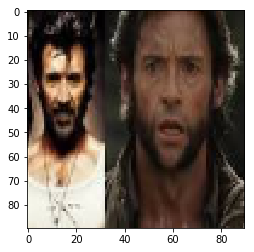

1/1 [==============================] - 0s
[1]


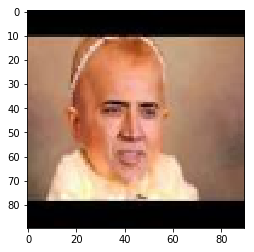

1/1 [==============================] - 0s
[1]


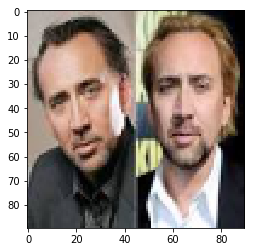

1/1 [==============================] - 0s
[1]


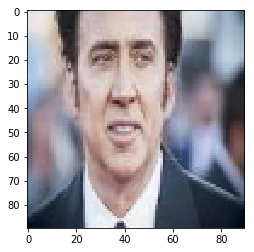

1/1 [==============================] - 0s
[1]


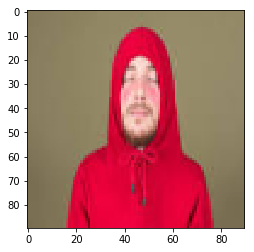

1/1 [==============================] - 0s
[0]


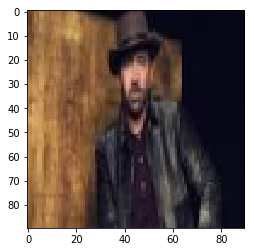

1/1 [==============================] - 0s
[1]


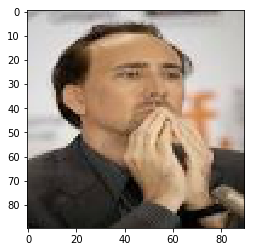

1/1 [==============================] - 0s
[1]


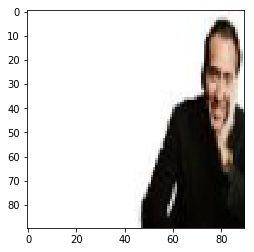

1/1 [==============================] - 0s
[1]


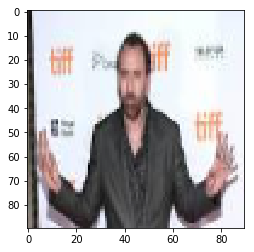

1/1 [==============================] - 0s
[1]


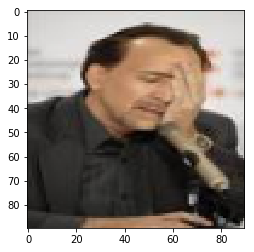

1/1 [==============================] - 0s
[1]


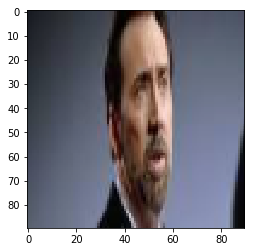

1/1 [==============================] - 0s
[1]


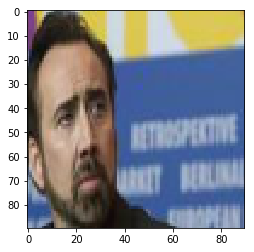

1/1 [==============================] - 0s
[1]


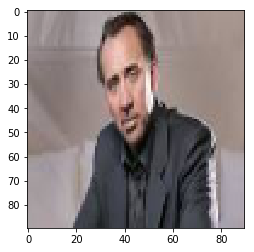

1/1 [==============================] - 0s
[1]


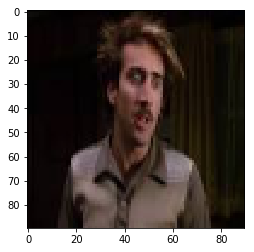

1/1 [==============================] - 0s
[1]


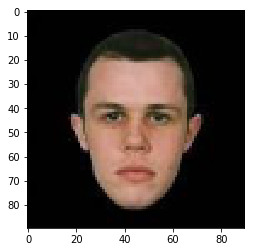

1/1 [==============================] - 0s
[0]


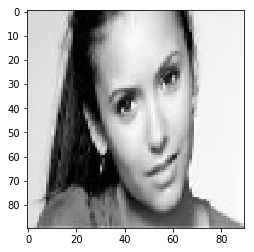

1/1 [==============================] - 0s
[0]


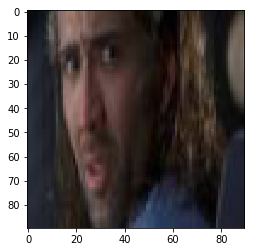

1/1 [==============================] - 0s
[1]


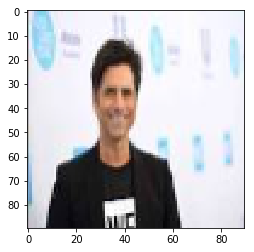

1/1 [==============================] - 0s
[0]


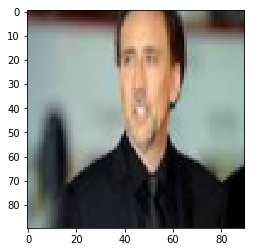

1/1 [==============================] - 0s
[1]


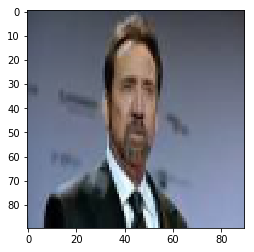

1/1 [==============================] - 0s
[1]


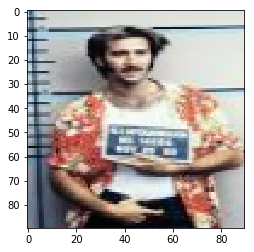

1/1 [==============================] - 0s
[1]


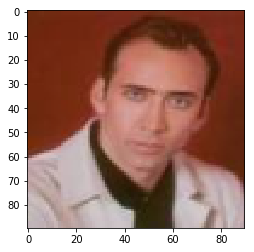

1/1 [==============================] - 0s
[1]


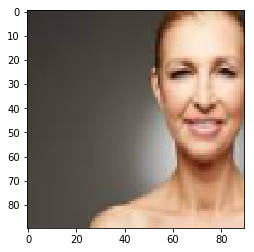

1/1 [==============================] - 0s
[1]


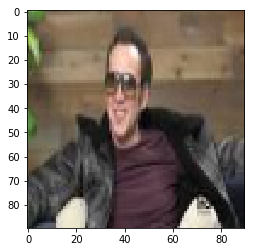

1/1 [==============================] - 0s
[1]


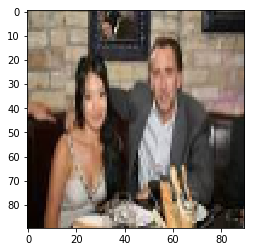

1/1 [==============================] - 0s
[1]


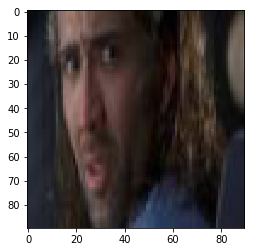

1/1 [==============================] - 0s
[1]


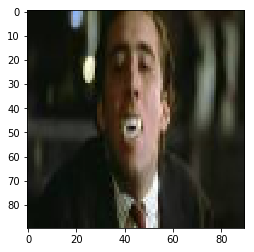

1/1 [==============================] - 0s
[1]


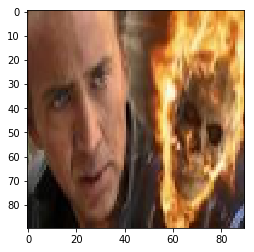

1/1 [==============================] - 0s
[1]


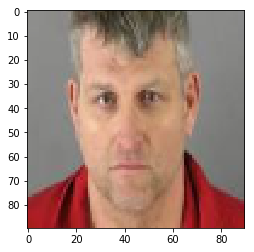

1/1 [==============================] - 0s
[0]


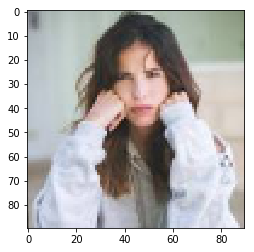

1/1 [==============================] - 0s
[0]


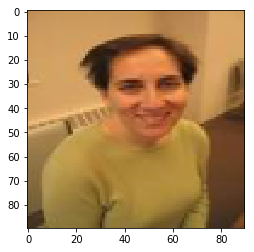

1/1 [==============================] - 0s
[1]


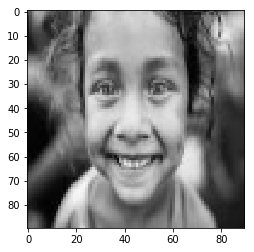

1/1 [==============================] - 0s
[0]


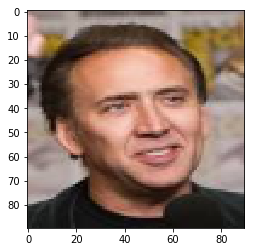

1/1 [==============================] - 0s
[1]


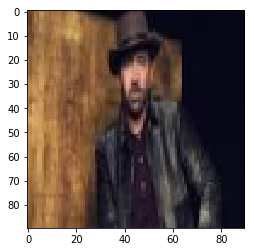

1/1 [==============================] - 0s
[1]


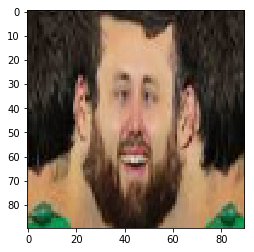

1/1 [==============================] - 0s
[1]


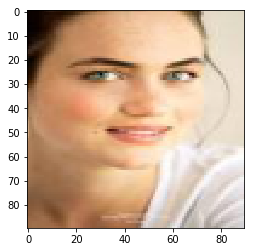

1/1 [==============================] - 0s
[0]


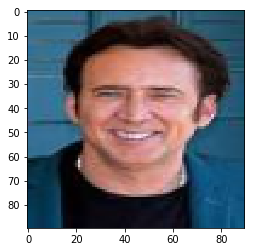

1/1 [==============================] - 0s
[1]


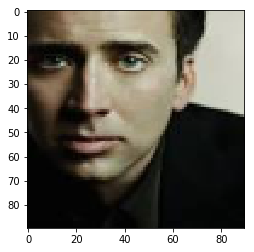

1/1 [==============================] - 0s
[1]


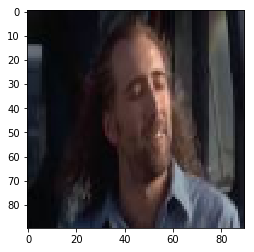

1/1 [==============================] - 0s
[1]


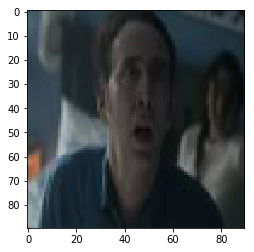

1/1 [==============================] - 0s
[1]


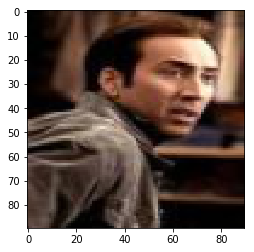

1/1 [==============================] - 0s
[1]


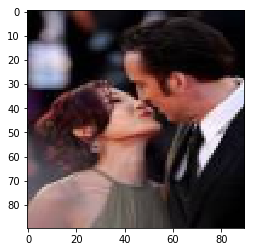

1/1 [==============================] - 0s
[1]


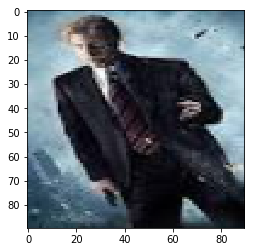

1/1 [==============================] - 0s
[1]


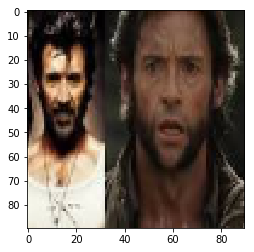

1/1 [==============================] - 0s
[1]


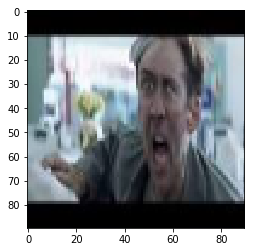

1/1 [==============================] - 0s
[1]


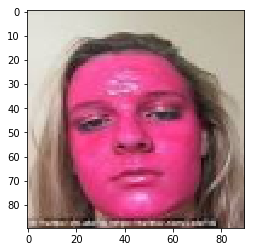

1/1 [==============================] - 0s
[0]


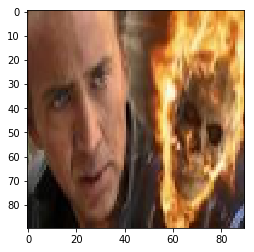

1/1 [==============================] - 0s
[1]


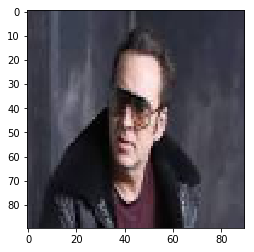

1/1 [==============================] - 0s
[1]


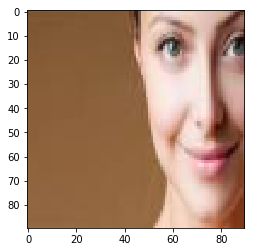

1/1 [==============================] - 0s
[0]


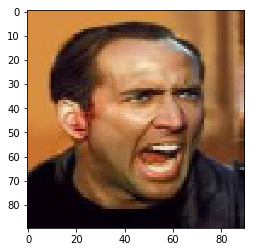

1/1 [==============================] - 0s
[1]


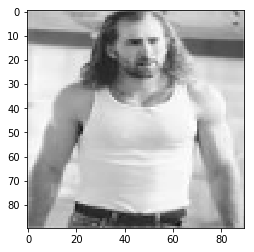

1/1 [==============================] - 0s
[0]


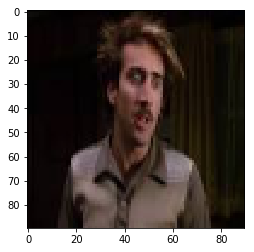

1/1 [==============================] - 0s
[1]


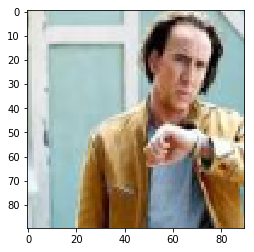

1/1 [==============================] - 0s
[1]


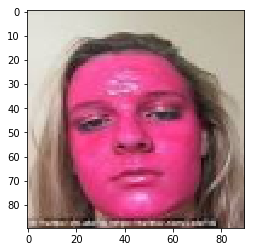

1/1 [==============================] - 0s
[0]


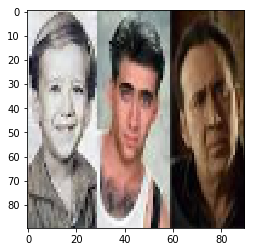

1/1 [==============================] - 0s
[1]


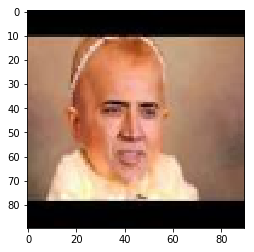

1/1 [==============================] - 0s
[1]


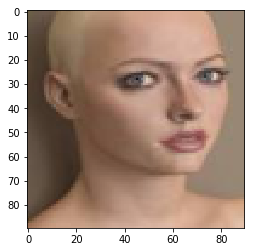

1/1 [==============================] - 0s
[0]


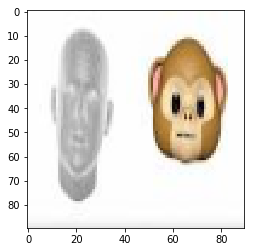

1/1 [==============================] - 0s
[0]


In [321]:
for b in range(200):
    n=np.random.randint(300)
    im=np.array(X_test[n])
    plt.imshow(im)
    plt.show()
    im=im.reshape(1,90,90,3)
    print(model.predict_classes(im))